In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import netCDF4
import xarray as xr

In [5]:
# import data
data = pd.read_csv('global.1751_2014.csv')
observation = pd.read_csv('co2_annmean_mlo.csv',skiprows=70)
# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,Source: Tom Boden (Oak Ridge National Laboratory),Gregg Marland (Appalachian State University),and Bob Andres (Oak Ridge National Laboratory),NaN,NaN,NaN,NaN,NaN
1,1751,3,0,0.0,3.0,0.0,0.0,NaN
2,1752,3,0,0.0,3.0,0.0,0.0,NaN
3,1753,3,0,0.0,3.0,0.0,0.0,NaN
4,1754,3,0,0.0,3.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
260,2010,9128,1696,3107.0,3812.0,446.0,67.0,1.32
261,2011,9503,1756,3134.0,4055.0,494.0,64.0,1.36
262,2012,9673,1783,3200.0,4106.0,519.0,65.0,1.36
263,2013,9773,1806,3220.0,4126.0,554.0,68.0,1.36


In [6]:
# check data
observation

,1985,346.35,0.12
0,1986,347.61,0.12
1,1987,349.31,0.12
2,1988,351.69,0.12
3,1989,353.20,0.12
4,1990,354.45,0.12
5,1991,355.70,0.12
6,1992,356.54,0.12
7,1993,357.21,0.12
8,1994,358.96,0.12
9,1995,360.97,0.12


In [7]:
# cut the unwanted data  and check data
data = data.iloc[1:,0:2]
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
1,1751,3
2,1752,3
3,1753,3
4,1754,3
5,1755,3
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


In [8]:
# select the data from 1987 to 2004 , transform the year to int 
data = data[(data['Year']>='1986')&(data['Year']<='2004')].reset_index(drop=True)
data['Year'] = data['Year'].astype(int)

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
0,1986,5583
1,1987,5725
2,1988,5936
3,1989,6066
4,1990,6074
5,1991,6142
6,1992,6078
7,1993,6070
8,1994,6174
9,1995,6305


In [9]:
# select the data from 1987 to 2004 and check data
obs = observation['346.35'][0:19]
obs

0     347.61
1     349.31
2     351.69
3     353.20
4     354.45
5     355.70
6     356.54
7     357.21
8     358.96
9     360.97
10    362.74
11    363.88
12    366.84
13    368.54
14    369.71
15    371.32
16    373.45
17    375.98
18    377.70
Name: 346.35, dtype: float64

In [10]:
# create new columns for total carbon emission in unit pg, observation and atmospheric CO2 level in ppm and check data
data['Total carbon emission in pg'] = data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(int)/1000
data['observation'] = obs
data['CO2 level in ppm(no buff)'] = 347
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff)
0,1986,5583,5.583,347.61,347
1,1987,5725,5.725,349.31,347
2,1988,5936,5.936,351.69,347
3,1989,6066,6.066,353.20,347
4,1990,6074,6.074,354.45,347
5,1991,6142,6.142,355.70,347
6,1992,6078,6.078,356.54,347
7,1993,6070,6.070,357.21,347
8,1994,6174,6.174,358.96,347
9,1995,6305,6.305,360.97,347


In [11]:
# 1.1 
# initialization
# assume that the speed of transfer speed is stationary
k12, k21 = 105/740, 102/900 
# the initial value of CO2 in sea and atmosphere
N1, N2 = 740, 900
# year
year = 1987
# the total molar of material of atmosphere
n0 = 740*10**21/12/347
#  the emission of every year
gamma =data['Total carbon emission in pg']


In [12]:
# start iteration
for year in range(1986,2005):
    # calculate the change of CO2 in sea and atmosphere
    dN1 = -k12*N1 + k21*N2 + gamma[year-1986]
    dN2 = k12*N1 - k21*N2
    # update the CO2 in sea and atmosphere
    N1 += dN1
    N2 += dN2
    # update the CO2 level in ppm, because 1986 is known,so the value does not change
    if year!=1986:
        data['CO2 level in ppm(no buff)'][year-1986] = N1*10**21/12/n0

# initialize value again to avoid the error by repeating the iteration
N1, N2 = 740, 900

# check data
data

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_17472\3868365482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(no buff)'][year-1986] = N1*10**21/12/n0
C:\Users\malinqiang\AppData\Local\Temp\ipykernel_17472\3868365482.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '349.4765921018992' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['CO2 level in ppm(no buff)'][year-1986] = N1*10**21/12/n0


,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff)
0,1986,5583,5.583,347.61,347.000000
1,1987,5725,5.725,349.31,349.476592
2,1988,5936,5.936,351.69,350.822203
3,1989,6066,6.066,353.20,352.200804
4,1990,6074,6.074,354.45,353.553674
5,1991,6142,6.142,355.70,354.915942
6,1992,6078,6.078,356.54,356.226925
7,1993,6070,6.070,357.21,357.522571
8,1994,6174,6.174,358.96,358.858888
9,1995,6305,6.305,360.97,360.243684


In [13]:
# 1.2

In [14]:
# create a new column for CO2 level in ppm with buffer
data['CO2 level in ppm(buff)'] = 347
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff),CO2 level in ppm(buff)
0,1986,5583,5.583,347.61,347.000000,347
1,1987,5725,5.725,349.31,349.476592,347
2,1988,5936,5.936,351.69,350.822203,347
3,1989,6066,6.066,353.20,352.200804,347
4,1990,6074,6.074,354.45,353.553674,347
5,1991,6142,6.142,355.70,354.915942,347
6,1992,6078,6.078,356.54,356.226925,347
7,1993,6070,6.070,357.21,357.522571,347
8,1994,6174,6.174,358.96,358.858888,347
9,1995,6305,6.305,360.97,360.243684,347


In [15]:
# initialization
# assume that the speed of transfer speed is stationary
k12, k21 = 105/740, 102/900 
# the initial value of CO2 in sea and atmosphere
N1, N2, N20= 740, 900, 821
# year
year = 1987
# the total molar of material of atmosphere
n0 = 740*10**21/12/347
# the emission of every year
gamma =data['Total carbon emission in pg']

In [16]:
# start iteration
for year in range(1986,2005):
    # calculate the buffer factor
    ksi = 3.69 + 1.86*10**(-2)*data['CO2 level in ppm(buff)'][year-1986] - 1.8*10**(-6)*data['CO2 level in ppm(buff)'][year-1986]**2
    # calculate the change of CO2 in sea and atmosphere
    dN1 = -k12*N1 + k21*(N20 + ksi*(N2 - N20)) + gamma[year-1986]
    dN2 = k12*N1 - k21*(N20 + ksi*(N2 - N20))
    # update the CO2 in sea and atmosphere
    N1 += dN1
    N2 += dN2
    # update the CO2 level in ppm
    if year!=1986:
        data['CO2 level in ppm(buff)'][year-1986] = N1*10**21/12/n0

# initialize value again to avoid the error by repeating the iteration
N1, N2 = 740, 900

# check data
data

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_17472\2762143797.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(buff)'][year-1986] = N1*10**21/12/n0
C:\Users\malinqiang\AppData\Local\Temp\ipykernel_17472\2762143797.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '378.37328975024855' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['CO2 level in ppm(buff)'][year-1986] = N1*10**21/12/n0


,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff),CO2 level in ppm(buff)
0,1986,5583,5.583,347.61,347.000000,347.000000
1,1987,5725,5.725,349.31,349.476592,378.373290
2,1988,5936,5.936,351.69,350.822203,383.446838
3,1989,6066,6.066,353.20,352.200804,385.284891
4,1990,6074,6.074,354.45,353.553674,387.998214
5,1991,6142,6.142,355.70,354.915942,390.510192
6,1992,6078,6.078,356.54,356.226925,393.049909
7,1993,6070,6.070,357.21,357.522571,395.574713
8,1994,6174,6.174,358.96,358.858888,398.151797
9,1995,6305,6.305,360.97,360.243684,400.782452


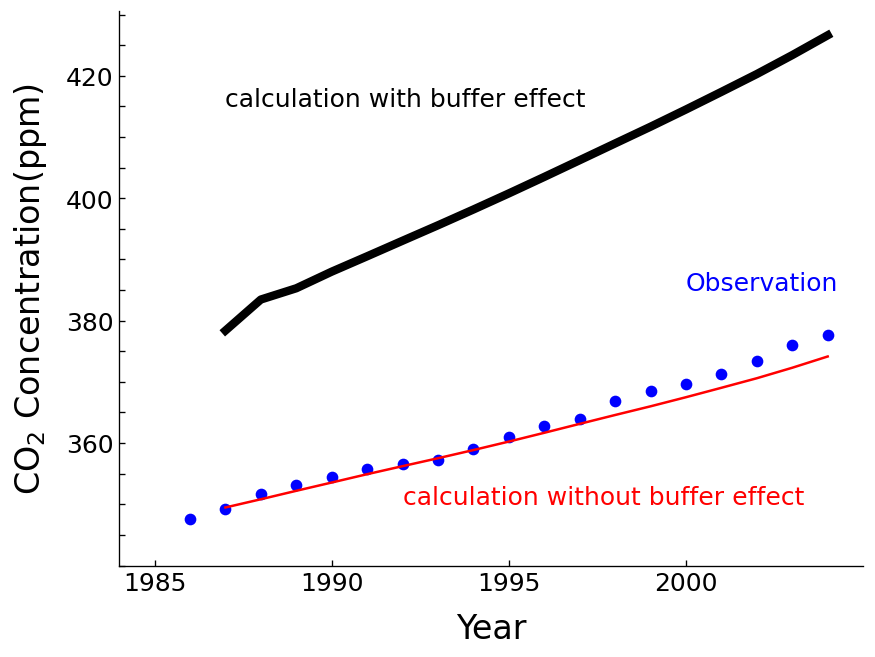

In [17]:
# 1.3
# plot the line and scatter
# creat a figure
plt.figure(figsize=(8,6),dpi=120)
plt.plot(data['Year'],data['observation'],linewidth=0,marker='o',markersize=6,color='blue')
plt.plot(data['Year'][1:],data['CO2 level in ppm(buff)'][1:],linewidth=5,color='black')
plt.plot(data['Year'][1:],data['CO2 level in ppm(no buff)'][1:],color='red')

# set the labels
plt.xlabel('Year',fontsize=20,labelpad=10)
plt.ylabel('CO$_2$ Concentration(ppm)',fontsize=20,labelpad=10)

# set the ticks
plt.xticks(np.arange(1985,2005,5),fontsize=15)
tick = np.arange(340, 431, 5)
tick_labels = [t if t in [360, 380, 400,420] else '' for t in tick]
plt.yticks(tick, tick_labels, fontsize=15)
plt.xlim([1984,2005])
plt.tick_params(axis='both', bottom=True, top=False,direction='in', which='major')


# set the text
plt.text(2000, 385, 'Observation', fontsize=15, color='blue')
plt.text(1987, 415, 'calculation with buffer effect', fontsize=15, color='black')
plt.text(1992, 350, 'calculation without buffer effect', fontsize=15, color='red')

# hide the right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [64]:
# bonus
# import data
# global emission data
data = pd.read_csv('global.1751_2014.csv')
# observation data
observation = pd.read_csv('trends-in-atmospheric-carbon-dioxide-concentration.csv')
# emission from land use change data
delta =  xr.open_dataset("Gasser_et_al_2020_best_guess.nc", engine="netcdf4")

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,Source: Tom Boden (Oak Ridge National Laboratory),Gregg Marland (Appalachian State University),and Bob Andres (Oak Ridge National Laboratory),NaN,NaN,NaN,NaN,NaN
1,1751,3,0,0.0,3.0,0.0,0.0,NaN
2,1752,3,0,0.0,3.0,0.0,0.0,NaN
3,1753,3,0,0.0,3.0,0.0,0.0,NaN
4,1754,3,0,0.0,3.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
260,2010,9128,1696,3107.0,3812.0,446.0,67.0,1.32
261,2011,9503,1756,3134.0,4055.0,494.0,64.0,1.36
262,2012,9673,1783,3200.0,4106.0,519.0,65.0,1.36
263,2013,9773,1806,3220.0,4126.0,554.0,68.0,1.36


In [65]:
# check data
observation

,Category,Ice Core & Mouna Loa
0,1750,277.00
1,1755,277.20
2,1760,277.60
3,1765,278.00
4,1770,278.60
...,...,...
101,2018,408.72
102,2019,411.65
103,2020,414.21
104,2021,416.41


In [66]:
# check data
delta

<xarray.Dataset>
Dimensions:             (year: 318, reg_land: 11, bio_land: 5, bio_from: 5,
                         bio_to: 5, bio_pool: 3)
Coordinates:
  * year                (year) int64 1701 1702 1703 1704 ... 2015 2016 2017 2018
    reg_land_long_name  (reg_land) object ...
  * reg_land            (reg_land) int32 0 1 2 3 4 5 6 7 8 9 10
  * bio_land            (bio_land) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_from            (bio_from) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_to              (bio_to) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_pool            (bio_pool) object 'Veg' 'Soil' 'HWP'
Data variables:
    Fnet                (year, reg_land, bio_pool) float32 ...
    Fland               (year, reg_land, bio_land, bio_pool) float32 ...
    Eluc                (year, reg_land, bio_from, bio_to, bio_pool) float32 ...
    Flasc               (year, reg_land, bio_from, bio_to, bio_pool) float32 ...
Attributes:
    info:     Best-guess historical land carbon fluxes simulated with OSCAR v3.1
    source:   (Gasser et al., 2020; doi:10.5194/bg-2020-33; revised version)
    date:     01 July 2020

In [67]:
# calculate the delta every year , and transform the result to dataframe
delta = delta.Eluc.sum(dim='reg_land').sum(dim='bio_from').sum(dim='bio_to').sum(dim='bio_pool')
delta = delta.to_dataframe().reset_index()

#check result
delta

,year,Eluc
0,1701,0.107347
1,1702,0.127463
2,1703,0.135468
3,1704,0.139354
4,1705,0.141562
...,...,...
313,2014,1.338192
314,2015,1.318125
315,2016,1.392152
316,2017,1.414536


In [68]:
# cut the unwanted data  and check data
delta = delta[(delta['year']>=1750)&(delta['year']<=2004)].reset_index(drop=True)

# check the result
delta

,year,Eluc
0,1750,0.163944
1,1751,0.163037
2,1752,0.163112
3,1753,0.163770
4,1754,0.164524
...,...,...
250,2000,1.245495
251,2001,1.242168
252,2002,1.286947
253,2003,1.382598


In [69]:
# cut the unwanted data  and check data
data = data.iloc[1:,0:2]
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
1,1751,3
2,1752,3
3,1753,3
4,1754,3
5,1755,3
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


In [70]:
# transform the year to int
data['Year'] = data['Year'].astype(int)

In [71]:
#add a row 0f 1750 to correspond to the observation data, assuming that the CO2 emission in 1750 is 3 million metric tons of C
data.loc[-1] = [1750,3]
data = data.sort_values('Year').reset_index(drop=True)

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
0,1750,3
1,1751,3
2,1752,3
3,1753,3
4,1754,3
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


In [73]:
# select the data from 1750 to 2004 and check data
data = data[(data['Year']>=1750)&(data['Year']<=2004)].reset_index(drop=True)

# create new columns for total carbon emission in unit pg
data['Total carbon emission in pg'] = data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(int)/1000

# create new columns for emission from land use change
data['Emission from land use change'] = delta['Eluc']

# create a new column for CO2 level
# 288 is the result 615^15/12/n0,n0 = 740*10**21/12/347, which is the total molar of material of atmosphere
data['CO2 level in ppm'] = 288

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,Emission from land use change,CO2 level in ppm
0,1750,3,0.003,0.163944,288
1,1751,3,0.003,0.163037,288
2,1752,3,0.003,0.163112,288
3,1753,3,0.003,0.163770,288
4,1754,3,0.003,0.164524,288
...,...,...,...,...,...
250,2000,6733,6.733,1.245495,288
251,2001,6893,6.893,1.242168,288
252,2002,6994,6.994,1.286947,288
253,2003,7376,7.376,1.382598,288


In [74]:
# select the data from 1750 to 2004 and check data
obs = observation[observation["Category"]<=2004].reset_index(drop=True)
# check data
obs

,Category,Ice Core & Mouna Loa
0,1750,277.00
1,1755,277.20
2,1760,277.60
3,1765,278.00
4,1770,278.60
...,...,...
83,2000,369.52
84,2001,371.13
85,2002,373.22
86,2003,375.77


In [75]:
# initialization

In [41]:
ds = xr.open_dataset("Gasser_et_al_2020_best_guess.nc", engine="netcdf4")
ds


<xarray.Dataset>
Dimensions:             (year: 318, reg_land: 11, bio_land: 5, bio_from: 5,
                         bio_to: 5, bio_pool: 3)
Coordinates:
  * year                (year) int64 1701 1702 1703 1704 ... 2015 2016 2017 2018
    reg_land_long_name  (reg_land) object ...
  * reg_land            (reg_land) int32 0 1 2 3 4 5 6 7 8 9 10
  * bio_land            (bio_land) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_from            (bio_from) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_to              (bio_to) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_pool            (bio_pool) object 'Veg' 'Soil' 'HWP'
Data variables:
    Fnet                (year, reg_land, bio_pool) float32 ...
    Fland               (year, reg_land, bio_land, bio_pool) float32 ...
    Eluc                (year, reg_land, bio_from, bio_to, bio_pool) float32 ...
    Flasc               (year, reg_land, bio_from, bio_to, bio_pool) float32 ...
Attributes:
    info:     Best-guess historical land carbon fluxes simulated with OSCAR v3.1
    source:   (Gasser et al., 2020; doi:10.5194/bg-2020-33; revised version)
    date:     01 July 2020

<xarray.DataArray 'Eluc' (year: 318, reg_land: 11, bio_from: 5, bio_to: 5,
                          bio_pool: 3)>
[262350 values with dtype=float32]
Coordinates:
  * year                (year) int64 1701 1702 1703 1704 ... 2015 2016 2017 2018
    reg_land_long_name  (reg_land) object ...
  * reg_land            (reg_land) int32 0 1 2 3 4 5 6 7 8 9 10
  * bio_from            (bio_from) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_to              (bio_to) object 'Forest' 'Non-Forest' ... 'Urban'
  * bio_pool            (bio_pool) object 'Veg' 'Soil' 'HWP'
Attributes:
    info:     bookkeeping LULCC emissions
    unit:     PgC yr-1

In [44]:
b=a.sum(dim='reg_land').sum(dim='bio_from').sum(dim='bio_to').sum(dim='bio_pool')

In [45]:
b

<xarray.DataArray 'Eluc' (year: 318)>
array([0.10734704, 0.1274631 , 0.13546771, 0.13935381, 0.14156199,
       0.14276475, 0.14290076, 0.14308536, 0.14292756, 0.14455801,
       0.14552197, 0.14576066, 0.14580292, 0.14556646, 0.14546531,
       0.14511633, 0.144887  , 0.1448738 , 0.1447609 , 0.14360413,
       0.14282575, 0.14263311, 0.14193141, 0.1417155 , 0.14136776,
       0.14104494, 0.14090717, 0.14082253, 0.14081967, 0.14228675,
       0.14333022, 0.14385593, 0.1441398 , 0.14434657, 0.14475775,
       0.14535135, 0.14573285, 0.14611033, 0.14671567, 0.15351313,
       0.15804055, 0.15989813, 0.16123933, 0.16250494, 0.16357571,
       0.16433677, 0.16513997, 0.16564831, 0.16603792, 0.16394448,
       0.16303748, 0.1631122 , 0.16377005, 0.16452354, 0.1655823 ,
       0.16695029, 0.16842765, 0.16970953, 0.17088342, 0.172827  ,
       0.1742357 , 0.1756945 , 0.1771554 , 0.17870894, 0.18018603,
       0.18175599, 0.18344906, 0.18511009, 0.1869101 , 0.19700772,
       0.20418793, 0.20793366, 0.21097603, 0.21376026, 0.21654335,
       0.21914434, 0.2216619 , 0.22355449, 0.2249218 , 0.2221367 ,
       0.22081614, 0.22161207, 0.22278911, 0.22408345, 0.22529969,
       0.22682413, 0.23003912, 0.23258987, 0.23404026, 0.23448917,
       0.2355653 , 0.23693708, 0.2382035 , 0.23961627, 0.2409597 ,
       0.24252605, 0.24391598, 0.24541128, 0.24696839, 0.25612098,
...
       1.0909584 , 1.0952368 , 1.1039083 , 1.1160425 , 1.1262195 ,
       1.1326472 , 1.1351912 , 1.142041  , 1.1413476 , 1.1801931 ,
       1.227066  , 1.2354368 , 1.2517759 , 1.2733798 , 1.2778329 ,
       1.2956597 , 1.3087108 , 1.3284419 , 1.3364346 , 1.3578532 ,
       1.3579432 , 1.3599662 , 1.3559345 , 1.357846  , 1.3470892 ,
       1.3423932 , 1.3544722 , 1.3415064 , 1.3326863 , 1.420374  ,
       1.4755034 , 1.507325  , 1.5258604 , 1.5448282 , 1.5604964 ,
       1.5766319 , 1.5816525 , 1.5888321 , 1.6106566 , 1.4928689 ,
       1.4506824 , 1.4340689 , 1.4178429 , 1.3929173 , 1.3600037 ,
       1.3578902 , 1.3489783 , 1.3396242 , 1.3459463 , 1.3511597 ,
       1.3329847 , 1.3052337 , 1.3270509 , 1.3076162 , 1.3067383 ,
       1.2819116 , 1.2748252 , 1.265916  , 1.2311581 , 1.2410252 ,
       1.2464441 , 1.2113944 , 1.210071  , 1.2261276 , 1.2275205 ,
       1.2172372 , 1.1948125 , 1.2382015 , 1.2377979 , 1.1795616 ,
       1.1515781 , 1.1441579 , 1.1567221 , 1.1532829 , 1.1541992 ,
       1.1592319 , 1.1414422 , 1.1442585 , 1.1424059 , 1.2454947 ,
       1.2421683 , 1.2869465 , 1.3825977 , 1.3391206 , 1.2894614 ,
       1.2835574 , 1.2712262 , 1.2844815 , 1.5056956 , 1.4120879 ,
       1.2358212 , 1.2972949 , 1.3517168 , 1.3381925 , 1.318125  ,
       1.3921523 , 1.4145362 , 1.3932788 ], dtype=float32)
Coordinates:
  * year     (year) int64 1701 1702 1703 1704 1705 ... 2014 2015 2016 2017 2018

In [46]:
b = b.to_dataframe()

In [47]:
b

,Eluc
year,
1701,0.107347
1702,0.127463
1703,0.135468
1704,0.139354
1705,0.141562
...,...
2014,1.338192
2015,1.318125
2016,1.392152
